In [66]:
# Install packages
!pip install matplotlib
!pip install numpy

In [ ]:
# get data from github

# TODO

In [1]:
import tensorflow as tf

2022-11-20 16:33:59.940385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
import os

# define the directories where the imgaes are

pizza_directory="./pizza/"
not_pizza_directory="./not_pizza/"

# get the images from the directories

not_pizza_files=[[0, not_pizza_directory, i] for i in os.listdir(not_pizza_directory)]
pizza_files=[[1, pizza_directory, i] for i in os.listdir(pizza_directory)]

print("Number of pizza images:",len(pizza_files))
print("Number of non-pizza images:",len(not_pizza_files))

# combine the image sets

all_files = not_pizza_files + pizza_files

print("Total number of images:", len(all_files))

# each element in all_files is of the format [is_pizza: boolean, directory: string, filename: string]
# in other words, for each `img` in `all_files`:
#    - img[0] = 0 if not pizza, 1 if pizza
#    - img[1] = directory where the image is
#    - img[2] = file name

Number of pizza images: 983
Number of non-pizza images: 983
Total number of images: 1966


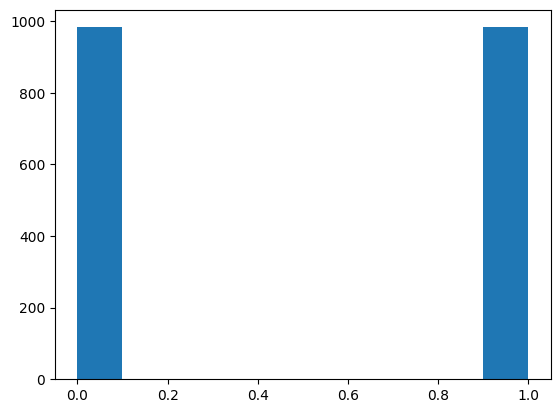

In [59]:
# this is not necessary, but we're doing it just incase

# plotting 

import matplotlib.pyplot as plt

classes = []

for img in all_files:
    classes.append(img[0])

plt.hist(classes)
plt.show()

In [ ]:
# We have two classes: Pizza and Not Pizza. We have 983 images each

In [50]:
# check size of all images

from PIL import Image


image_sizes_set = set()
image_sizes = []

for image in all_files:
    imgData = Image.open(image[1] + image[2]).convert("L")
    image_sizes_set.add(imgData.size)
    image_sizes.append(imgData.size)

for size in image_sizes_set:
    num = image_sizes.count(size)
    print(f'{size}: {num}')
      

(512, 342): 11
(512, 461): 1
(512, 287): 4
(341, 512): 4
(512, 406): 1
(508, 512): 1
(512, 308): 1
(512, 366): 3
(512, 372): 1
(288, 512): 4
(343, 512): 1
(512, 439): 1
(512, 445): 1
(512, 384): 362
(510, 512): 2
(512, 509): 3
(512, 329): 1
(424, 512): 2
(512, 506): 1
(512, 512): 1084
(382, 512): 66
(512, 451): 1
(512, 396): 1
(512, 332): 1
(512, 341): 31
(512, 335): 1
(307, 512): 3
(512, 338): 1
(512, 344): 2
(512, 289): 19
(512, 469): 1
(512, 307): 9
(512, 374): 1
(512, 432): 2
(384, 512): 150
(329, 512): 1
(512, 377): 1
(287, 512): 2
(512, 441): 1
(386, 512): 1
(342, 512): 1
(289, 512): 8
(507, 512): 1
(512, 383): 9
(366, 512): 1
(512, 459): 2
(512, 511): 12
(512, 398): 1
(512, 343): 1
(512, 340): 9
(443, 512): 1
(512, 410): 1
(512, 288): 13
(445, 512): 1
(512, 352): 1
(511, 512): 11
(324, 512): 1
(388, 512): 1
(383, 512): 5
(500, 512): 1
(491, 512): 1
(512, 306): 24
(442, 512): 1
(306, 512): 8
(512, 434): 1
(512, 312): 1
(512, 318): 1
(512, 382): 52
(512, 388): 2
(512, 446): 1
(512

In [64]:
# We notice that more than half of the images are of the size 512x512
# Hence for preprocessing we will skew (i.e. stretch) the images to 512x512

# We will use the PIL library to stretch the images to a standard size of 512x512. 
# Then we will use np.array and Image.open() to convert the images to a 2d array of rgb values, and then store them into a pandas dataframe.
# i.e. each image is converted to a 3d array of dimensions [512][512][3]

In [54]:
# example of converting image to 3d numpy array

import numpy as np

img = Image.open(all_files[0][1] + all_files[0][2])

img.show()
print(np.array(img))

[[[ 23  10   2]
  [ 25  12   4]
  [ 28  13   6]
  ...
  [ 12   7   4]
  [ 10   5   2]
  [  9   4   1]]

 [[ 23  10   2]
  [ 25  12   4]
  [ 28  13   6]
  ...
  [ 12   7   4]
  [ 11   6   3]
  [  9   4   1]]

 [[ 24  11   3]
  [ 26  13   5]
  [ 29  14   7]
  ...
  [ 12   7   4]
  [ 10   6   3]
  [  8   4   1]]

 ...

 [[ 93  37  12]
  [ 94  38  13]
  [ 95  39  14]
  ...
  [ 69  17   6]
  [ 64  12   1]
  [ 60   8   0]]

 [[ 94  40  14]
  [ 97  43  17]
  [100  46  20]
  ...
  [ 59  10   0]
  [ 58   9   0]
  [ 57   8   0]]

 [[ 86  32   6]
  [ 92  38  12]
  [ 97  43  17]
  ...
  [ 75  26  12]
  [ 77  28  14]
  [ 80  31  17]]]
